Note: this tutorial is a fork with some additions and changes from Valetin Haenel's tutorial on SciPy

# General comments

Numpy provides functionality and numerical methods that are highly similar to those in Matlab. Hence, much of the logic and how you deal with data will be familiar to those skilled in Matlab.

There are a few key differences, however, which are nicely summarized here:

https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

# The Numpy array object

### Section contents

* What are Numpy and Numpy arrays?
* Reference documentation
* Import conventions
* Creating arrays
* Functions for creating arrays
* Basic data types
* Basic visualization
* Indexing and slicing
* Copies and views
* Fancy indexing


## What are Numpy and Numpy arrays?

**Python** objects


* high-level number objects: integers, floating point

* containers: lists (costless insertion and append), dictionaries (fast
lookup)


**Numpy** provides


* extension package to Python for multi-dimensional arrays

* closer to hardware (efficiency)

* designed for scientific computation (convenience)

* Also known as *array oriented computing*


In [1]:
import numpy as np
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

For example, we can would use arrays containing:


* values of an experiment/simulation at discrete time steps

* signal recorded by a measurement device, e.g. sound wave

* pixels of an image, grey-level or colour

* 4-D data measured at different X-Y-Z positions and in time, e.g. MRI scans

* ...


**Why it is useful:** Memory-efficient container that provides fast
**numerical** operations. Again, we are dealing here with numbers! 

To illustrate this, let's use the **timeit** functionality in python in order to check run-time for two different loops calculating the squares of the numbers from 0 to 999. 

In [ ]:
L = range(1000)
L

In [ ]:
%timeit [i**2 for i in L]

In [ ]:
a = np.arange(1000)

In [ ]:
%timeit a**2

## Reference documentation

* On the web: [http://docs.scipy.org](http://docs.scipy.org)/

* Interactive help:


In [2]:
np.array?

* Looking for something:


In [3]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In [ ]:
np.con*?

## Import conventions

The general convention to import numpy is:


In [ ]:
import numpy as np

Using this style of import is recommended.


## Creating arrays

* **1-D**:


In [ ]:
a = np.array([0, 1, 2, 3])
a

In [4]:
a.ndim

1

In [5]:
a.shape

(4,)

In [6]:
len(a)

4

* **2-D, 3-D, ...**:


In [ ]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

In [ ]:
b.ndim

In [ ]:
b.shape

In [ ]:
len(b)     # returns the size of the first dimension

In [7]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [8]:
c.shape

(2, 2, 1)

## Functions for creating arrays

In practice, we rarely enter items one by one. We will usually want some range of numbers or some specific pattern.


* Evenly spaced:


In [ ]:
a = np.arange(10) # 0 .. n-1  (!)
a

In [ ]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

* or by number of points:


In [ ]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

In [ ]:
d = np.linspace(0, 1, 5, endpoint=False)
d

* Common arrays:


In [ ]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

In [ ]:
b = np.zeros((2, 2))
b

In [ ]:
c = np.eye(3)
c

In [ ]:
d = np.diag(np.array([1, 2, 3, 4]))
d

* `np.random` random numbers (based on the Mersenne Twister Pseudo RNG):

In [9]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.50755507, 0.0211933 , 0.43352176, 0.44631306])

In [10]:
b = np.random.randn(4)      # Gaussian
b  

array([ 0.65034618, -0.51433646,  0.53942869,  1.52676162])

In order to get reproducible results with random numbers, we can "seed" the random number generation process with a starting value. This way, every time we execute the code following the seeding, we will get the same result!

In [ ]:
np.random.seed(1234)        # Setting the random seed

## Basic data types

Be mindful of the basic data types python (and numpy) assume. If you would like to get floating point numbers, use the trailing dot (e.g. `2.` vs `2`):


In [ ]:
a = np.array([1, 2, 3])
a.dtype

In [ ]:
b = np.array([1., 2., 3.])
b.dtype

## Tip

Different data-types allow us to store data more compactly in memory,
but most of the time we simply work with floating point numbers. Note
that, in the example above, NumPy auto-detects the data-type from the
input.


You can explicitly specify which data-type you want:


In [ ]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

For the inbuilt functions, note that the **default** data type is floating point:


In [ ]:
a = np.ones((3, 3))
a.dtype

There are also other types:


Complex


In [ ]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype

Bool


In [ ]:
e = np.array([True, False, False, True])
e.dtype

Strings


In [ ]:
f = np.array(['Bonjour', 'Hello', 'Hallo',])
f.dtype     # <--- strings containing max. 7 letters

There are additional data types that can help for specific applications


* `int32`

* `int64`

* `uint8` this is of course useful for images!

* `unit32`

* `unit64`


## Basic visualization

## Tip

In [26]:
%matplotlib inline

*Matplotlib* is a 2D plotting package. We can import its functions as
below:


In [27]:
import matplotlib.pyplot as plt  # the tidy way
import numpy as np

And then use (note that you have to use `show` explicitly):


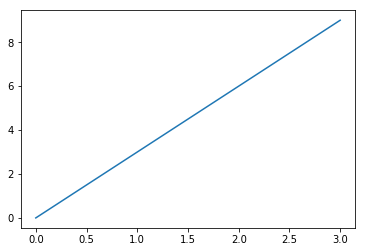

In [28]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    
plt.show()           # <-- shows the plot (not needed with pylab) 

Or, if you are using *pylab*:


In [29]:
# plot(x, y)       # line plot    

Using `import matplotlib.pyplot as plt` is recommended for use in
scripts. Whereas `pylab` is recommended for interactive exploratory
work.


* **1D plotting**:


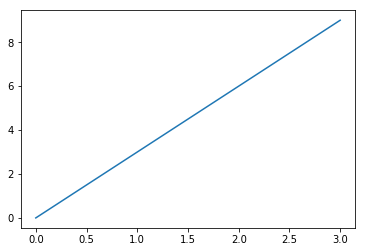

In [30]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

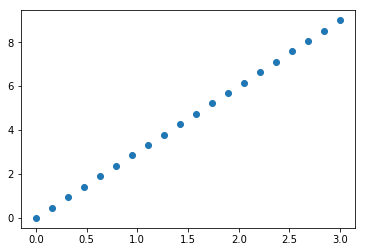

In [31]:
plt.plot(x, y, 'o')  # dot plot    

* **2D arrays** (such as images):


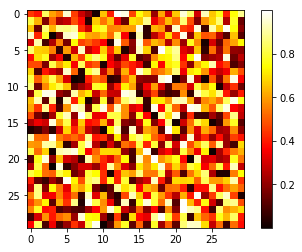

In [32]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()
plt.show()

## Indexing and slicing

The items of an array can be accessed and assigned to the same way as
other Python sequences (e.g. lists):


In [ ]:
a = np.arange(10)
a

In [ ]:
a[0], a[2], a[-1]

## Warning

Again, indices begin at 0, like other Python sequences (and C/C++). In
contrast, in Fortran or Matlab, indices begin at 1.


The usual python idiom for reversing a sequence is supported:


In [ ]:
a[::-1]

For multidimensional arrays, indexes are tuples of integers:


In [ ]:
a = np.diag(np.arange(3))
a

In [ ]:
a[1, 1]

In [ ]:
a[2, 1] = 10 # third row, second column
a

In [ ]:
a[1] # note that this will pull put the second row, you don't need the :

Note that:


* In 2D, the first dimension corresponds to rows, the second to columns.

* Again: the first dimension corresponds to **rows**, the
second to **columns**.

* for multidimensional `a`, `a[0]` is interpreted by taking all elements
in the unspecified dimensions.


**Slicing** Arrays, like other Python sequences can also be sliced:


In [ ]:
a = np.arange(10)
a

In [ ]:
a[2:9:3] # [start:end:step]

Note that the last index is not included! This is most likely for symmetry reasons, since all other specified range numbers also go until n-1.


In [ ]:
a[:4]

All three slice components are not required: by default, \`start\` is 0,
\`end\` is the last and \`step\` is 1:


In [ ]:
a[1:3]

In [ ]:
a[::2]

In [ ]:
a[3:]

A small illustrated summary of Numpy indexing and slicing...


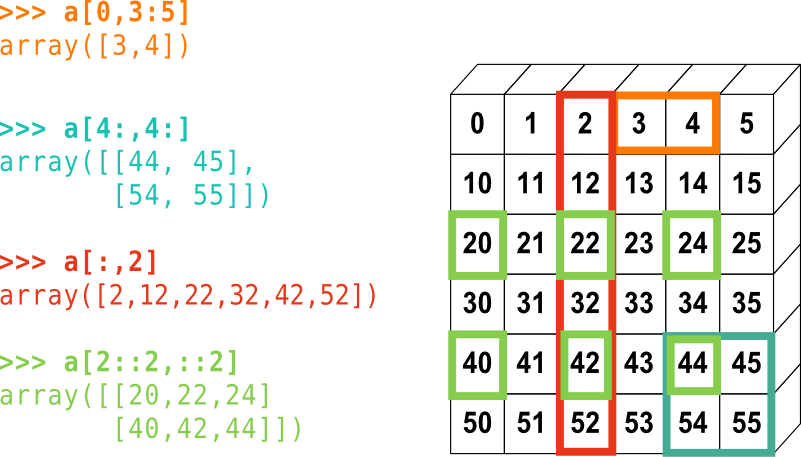

In [33]:
from IPython.display import Image
Image(filename='images/numpy_indexing.png')

You can also combine assignment and slicing:


In [ ]:
a = np.arange(10)
a[5:] = 10
a

In [ ]:
b = np.arange(5)
a[5:] = b[::-1]
a

## Tip: array expansion for array creation

If you would like to create this array, you can use the expression below that makes use of very fancy (and very dangerous!) expansion defaults in numpy arrays. In essence, when you add two transposed arrays, numpy will add the column for element of the row vector: 


In [34]:
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

Here is this illustrated with manual array input:

In [35]:
np.array([0,1,2,3]) + np.array([[10],[20],[30]])

array([[10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

## Tip: Using tiling for array creation

Using `np.tile`, we would like to create the following array:

In [ ]:
np.tile(np.array([[4,3],[2,1]]),(2,3))

## Copies and views - BE AWARE OF THIS!

A slicing operation creates a **view** on the original array, which is
just a way of accessing array data. Thus the original array is not
copied in memory. You can use `np.may_share_memory()` to check if two
arrays share the same memory block. Note however, that this uses
heuristics and may give you false positives.


**When modifying the view, the original array is modified as well**:


In [ ]:
a = np.arange(10)
a

In [ ]:
b = a[::2]
b

In [ ]:
np.may_share_memory(a, b)

In [ ]:
b[0] = 12
b

In [ ]:
a   # now this gets changed, too!!!!!

In [ ]:
a = np.arange(10)
c = a[::2].copy()  # force a copy
c[0] = 12
a

In [ ]:
np.may_share_memory(a, c)

This behavior can be surprising at first sight... but it allows to save
both memory and time.


## Worked example: Prime number sieve

In [ ]:
from IPython.display import Image
Image(filename='images/prime-sieve.png')

Compute prime numbers in 0--99, with a sieve


* Construct a shape (100,) boolean array `is_prime`, filled with True in
the beginning:


In [ ]:
is_prime = np.ones((100,), dtype=bool)
is_prime

* Cross out 0 and 1 which are not primes:


In [ ]:
is_prime[:2] = 0
is_prime

* For each integer `j` starting from 2, cross out its higher multiples:


In [ ]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j] = False
is_prime

* You can use `np.nonzero` to print the prime numbers given the is_prime array

* Follow-up:

    * Moving the code into a script file named `prime_sieve.py`

    * Use the optimization suggested in [the sieve of
Eratosthenes](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes):

      * Skip `j` which are already known to not be primes

      * The first number to cross out is $j^2$


## Fancy/boolean indexing

Numpy arrays can be indexed with slices, but also with boolean or
integer arrays (**masks**). This method is called *fancy indexing* and is identical to boolean indexing in Matlab. Also note that the result of this indexing method creates **copies not views**.


### Using boolean masks

In [ ]:
np.random.seed(3)
a = np.random.randint(0, 20, 15)
a

In [ ]:
a % 3 == 0

In [ ]:
mask = a % 3 == 0
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask

Indexing with a mask can be very useful to assign a new value to a
sub-array:


In [ ]:
a[a % 3 == 0] = -1
a

### Indexing with an array of integers

In [ ]:
a = np.arange(0, 100, 10)
a

Indexing can be done with an array of integers, where the same index is
repeated several time:


In [ ]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a standard Python list

New values can be assigned with this kind of indexing:


In [ ]:
a[[9, 7]] = -100
a

### Tip

When a new array is created by indexing with an array of integers, the
new array has the same shape than the array of integers:


In [ ]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

In [ ]:
a[idx]

The image below illustrates various fancy indexing applications


In [ ]:
from IPython.display import Image
Image(filename='images/numpy_fancy_indexing.png')

# Comment

Numpy also offers another data type called `matrix`, where data is stored in a format directly suitable for linear algebra operations. In most cases, however, using the standard numpy `array` data type is recommended - this is especially true when dealing with other packages which often accept numpy `array`s!